In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

In [2]:
df = pd.read_pickle('datasets/berlinmod-test2.pkl')

In [3]:
df.shape

(370, 3)

In [4]:
df.head(10)

longitude  latitude  trip
Moid time                                              
1    2007-05-27 00:00:00.000    17.9888   47.3159     1
     2007-05-29 09:08:08.941    17.9888   47.3159     1
3    2007-05-27 00:00:00.000    17.9888   47.3159     2
     2007-05-29 09:57:29.116    17.9888   47.3159     2
     2007-05-29 21:11:01.801    17.9888   47.3159     2
5    2007-05-27 00:00:00.000    17.9561   47.3131     3
     2007-05-28 09:23:49.649    17.9561   47.3131     4
     2007-05-28 09:23:49.650    17.9888   47.3159     5
     2007-05-28 14:33:31.157    17.9888   47.3159     5
     2007-05-29 08:18:53.058    17.9561   47.3131     6

In [15]:
df.index.unique(0).shape

(111,)

In [16]:
df['trip'].unique().shape

(135,)

In [5]:
df['latitude'].describe()

count    370.000000
mean      47.315007
std        0.001329
min       47.313100
25%       47.313100
50%       47.315900
75%       47.315900
max       47.319200
Name: latitude, dtype: float64

In [6]:
df['longitude'].describe()

count    370.000000
mean      17.978236
std        0.015316
min       17.956100
25%       17.956100
50%       17.988800
75%       17.988800
max       18.002500
Name: longitude, dtype: float64

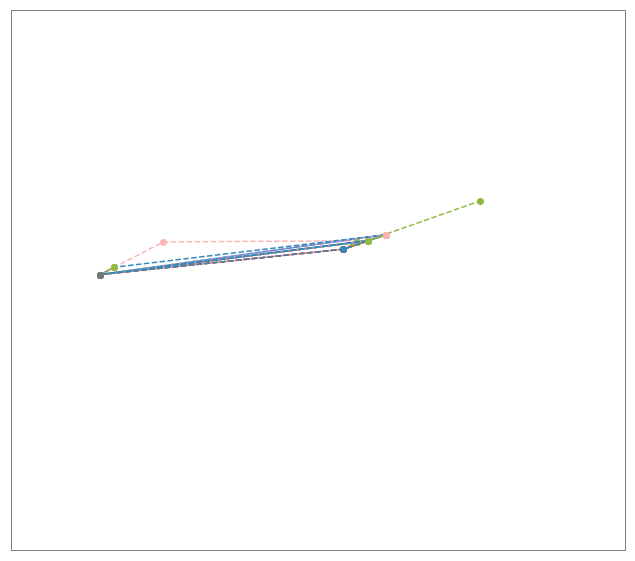

In [22]:
plt.figure(figsize = (11, 11))
    
img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
#ax.set_extent((9.8457000, 9.8852000, 53.2732000, 53.29710005))
#ax.set_extent((17.9836000, 18.0123000, 47.3096000, 47.3265000))
#ax.set_extent((df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()))
#ax.set_extent((17.956100, 18.002500, 47.313100, 47.319200))
ax.set_extent((17.945147, 18.0201297, 47.2902535, 47.334994))
    
#ax.add_image(img, 12, interpolation = 'bicubic')

for moid in df.index.levels[0]:
    lats = df.loc[moid]['latitude']
    lons = df.loc[moid]['longitude']
    plt.plot(lons, lats, 'o--', transform=ccrs.PlateCarree())